In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv(r"C:\Users\George\Documents\Football Analytics\Data\1995_96 - 2020 Premier league standings.csv")

In [7]:
df['GD'] = df['GF'] - df['GA']

In [8]:
y = df.Rk
x = df.GD.values.reshape(-1, 1)

In [9]:
print(x.shape,y.shape)

(500, 1) (500,)


In [10]:
model = LinearRegression().fit(x, y)

In [14]:
r_sq = model.score(x, y) # R^2 value  
intercept = model.intercept_ # intercept
slope = model.coef_ 

In [13]:
print(r_sq)

0.8384102509297338


In [20]:
y_pred = intercept + slope * x

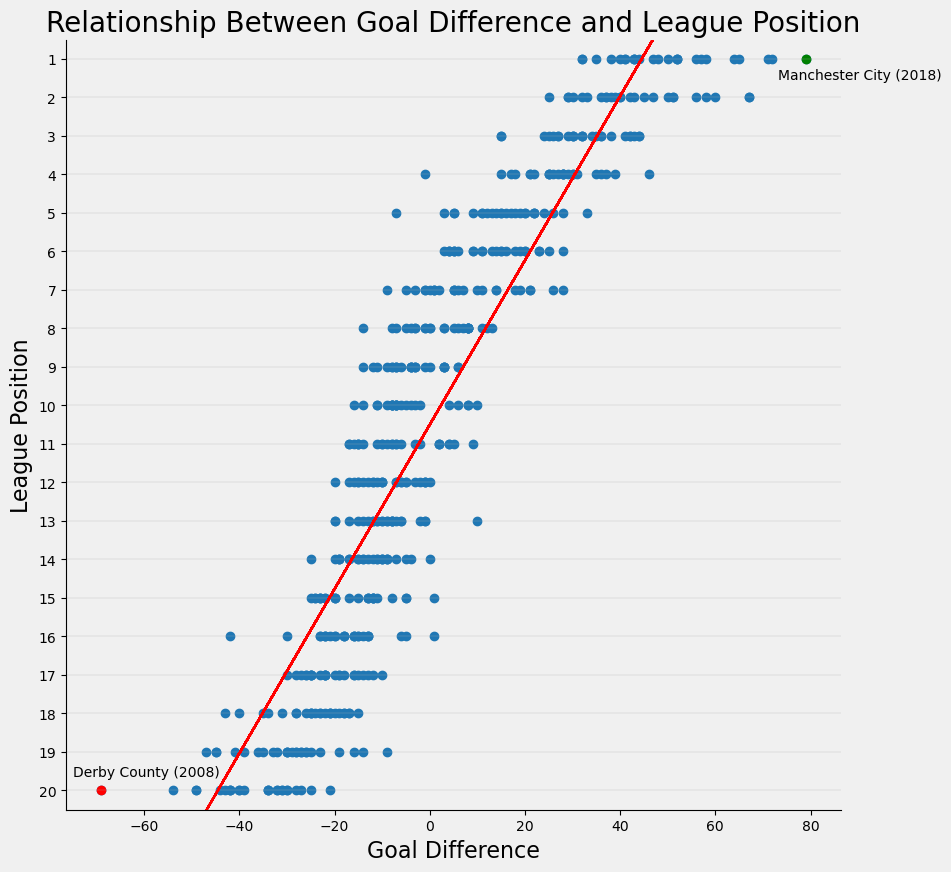

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))

# Set the background color
fig.set_facecolor('#F0F0F0')

plt.scatter(x, y)
plt.yticks([i for i in range(1, 21)])
plt.gca().invert_yaxis()
plt.plot(x, y_pred, color='red')    
plt.ylim(20.5, 0.5)
plt.xlabel('Goal Difference', fontsize=16)
plt.ylabel('League Position', fontsize=16)
plt.title('Relationship Between Goal Difference and League Position', fontsize=20)

# Label the data points
worst_goal_diff = df['GD'].idxmin()
best_goal_diff = df['GD'].idxmax()

worst_team_name = df.loc[worst_goal_diff, 'Squad']
worst_season = df.loc[worst_goal_diff, 'Year']
combined_worst = f"{worst_team_name} ({worst_season})"

best_team_name = df.loc[best_goal_diff, 'Squad']
best_season = df.loc[best_goal_diff, 'Year']
combined_best = f"{best_team_name} ({best_season})"

# Color the minimum and maximum points
ax.scatter(x[worst_goal_diff], y[worst_goal_diff], color='red')
ax.scatter(x[best_goal_diff], y[best_goal_diff], color='green')

# Annotate the minimum and maximum points
ax.annotate(combined_worst, (x[worst_goal_diff], y[worst_goal_diff]), xytext=(-20, 10), textcoords='offset points')
ax.annotate(combined_best, (x[best_goal_diff], y[best_goal_diff]), xytext=(-20, -15), textcoords='offset points')

# Remove right and top borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_facecolor('#F0F0F0')

plt.grid(axis='y', linewidth=0.2)
plt.show()

In [62]:
df[df['Squad']== 'Norwich City']

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year,GD
198,19,Norwich City,38,7,12,19,42,77,33,24326,Damien Francis Leon McKenzie... - 7,Robert Green,2005,-35
331,12,Norwich City,38,12,11,15,52,66,47,26606,Grant Holt - 15,John Ruddy,2012,-14
350,11,Norwich City,38,10,14,14,41,58,44,26672,Grant Holt - 8,Mark Bunn,2013,-17
377,18,Norwich City,38,8,9,21,28,62,33,26805,Gary Hooper Robert Snodgrass - 6,John Ruddy,2014,-34
418,19,Norwich City,38,9,7,22,39,67,34,26972,Dieumerci Mbokani - 7,John Ruddy,2016,-28
499,20,Norwich City,38,5,6,27,26,75,21,19913,Teemu Pukki - 11,Tim Krul,2020,-49
